In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

from utils import *

In [60]:
epiyear = 2024
epiweek = 48 
ref_date = epiweek_to_dates(epiyear, epiweek).enddate() #Saturday at the end of epiweek

results_dir = '../../results/'
figures_dir = '../../figures/' 
start_date = '2024-10-12'

df_metrics = pd.read_csv(results_dir+"/_metrics/metrics_" +ref_date.strftime("%Y-%m-%d") +'.csv')

df_metrics['target_date'] = pd.to_datetime(df_metrics['target_date'], format="%Y-%m-%d") #format='%m/%d/%Y') #
df_metrics = df_metrics[df_metrics['target_date']>=start_date]

filtered_models = []
df_metrics = df_metrics[~df_metrics['model'].isin(filtered_models)]

# selected_models = []
# df_metrics = df_metrics[df_metrics['model'].isin(selected_models)]

df_wis = df_metrics[df_metrics.metric=='wis'].drop(columns='metric').rename(columns={'value':'wis'})

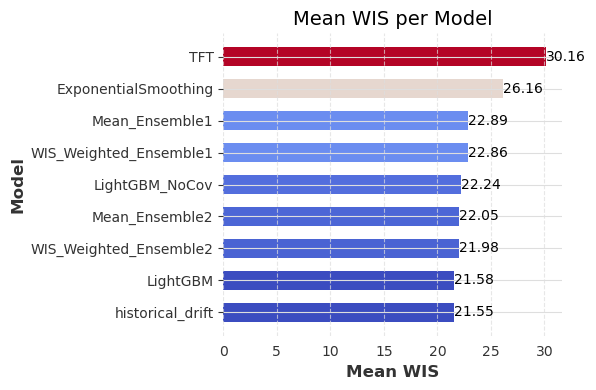

In [61]:
# Group by 'model' and calculate mean WIS
mean_wis_per_model = df_wis.groupby('model')['wis'].mean().sort_values()

models = mean_wis_per_model.index

#colors = plt.cm.tab20(np.linspace(0, 1, len(models)))
norm = plt.Normalize(mean_wis_per_model.min(), mean_wis_per_model.max())
colors = cm.coolwarm(norm(mean_wis_per_model))

# Plotting
plt.figure(figsize=(6, 4))
bars = plt.barh(models, mean_wis_per_model, color=colors, height=0.6)
for bar, value in zip(bars, mean_wis_per_model):
    plt.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', 
             va='center', ha='left', fontsize=10)
plt.title('Mean WIS per Model', fontsize=14)
plt.xlabel('Mean WIS', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

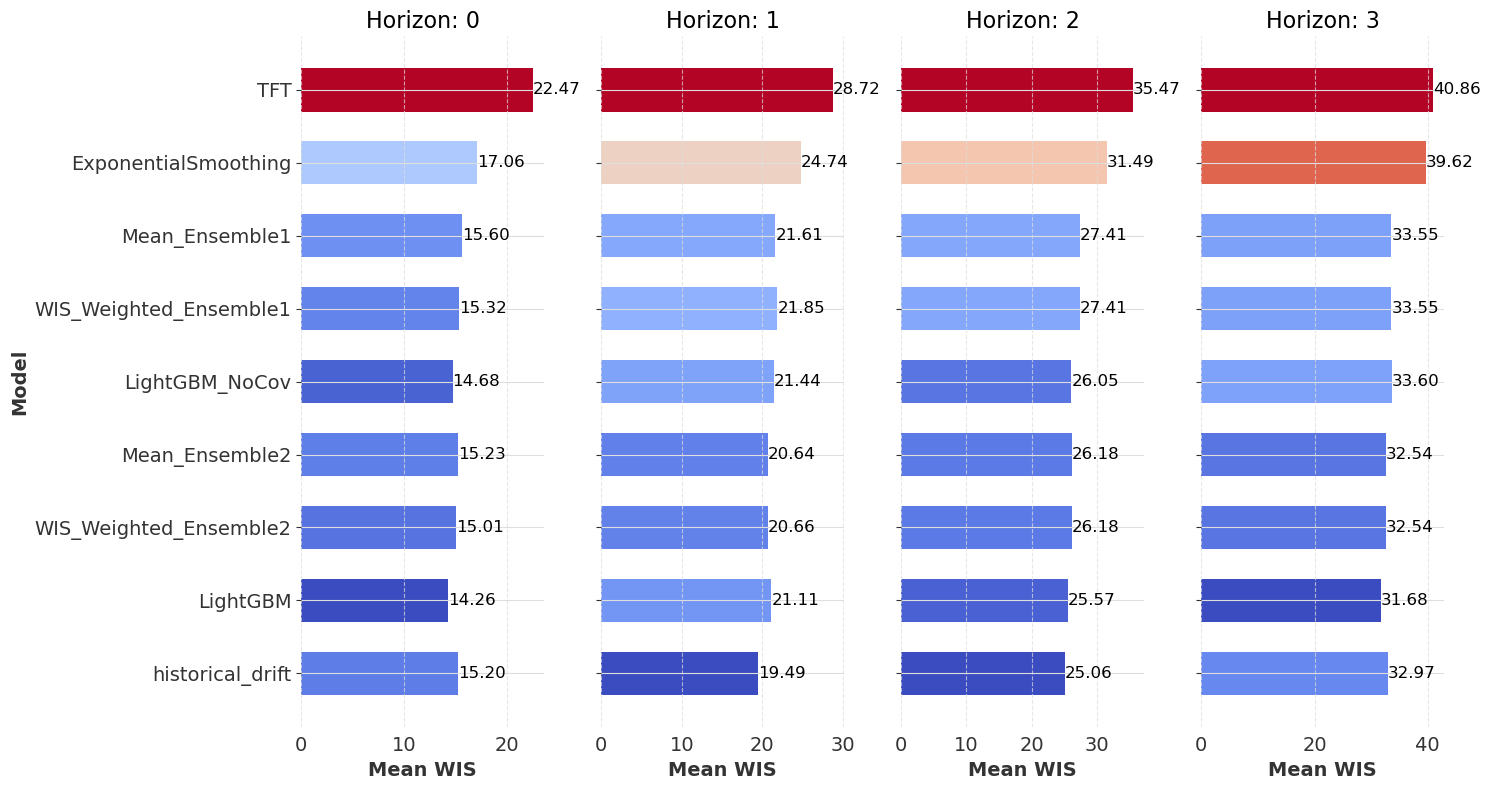

In [62]:
mean_wis_per_horizon = df_wis.groupby(['horizon', 'model'])['wis'].mean().unstack()
mean_wis_per_horizon = mean_wis_per_horizon[models]  # Sort columns by overall mean WIS order

fig, axes = plt.subplots(1, 4, figsize=(15, 8), sharey=True)
for i, horizon in enumerate(mean_wis_per_horizon.index):
    ax = axes[i]
    horizon_values = mean_wis_per_horizon.loc[horizon]
    
    # Normalize WIS values for color mapping
    norm = plt.Normalize(horizon_values.min(), horizon_values.max())
    colors = cm.coolwarm(norm(horizon_values))
    
    bars = ax.barh(mean_wis_per_horizon.columns, horizon_values, color=colors, height=0.6)
    
    # Add mean WIS values near each bar
    for bar, value in zip(bars, horizon_values):
        ax.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', 
                va='center', ha='left', fontsize=12)
    
    ax.set_title(f'Horizon: {horizon}', fontsize=16)
    if i == 0:
        ax.set_ylabel('Model', fontsize=14)
    ax.set_xlabel('Mean WIS', fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.set_yticks(range(len(mean_wis_per_horizon.columns)))
    ax.set_yticklabels(mean_wis_per_horizon.columns, fontsize=14)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

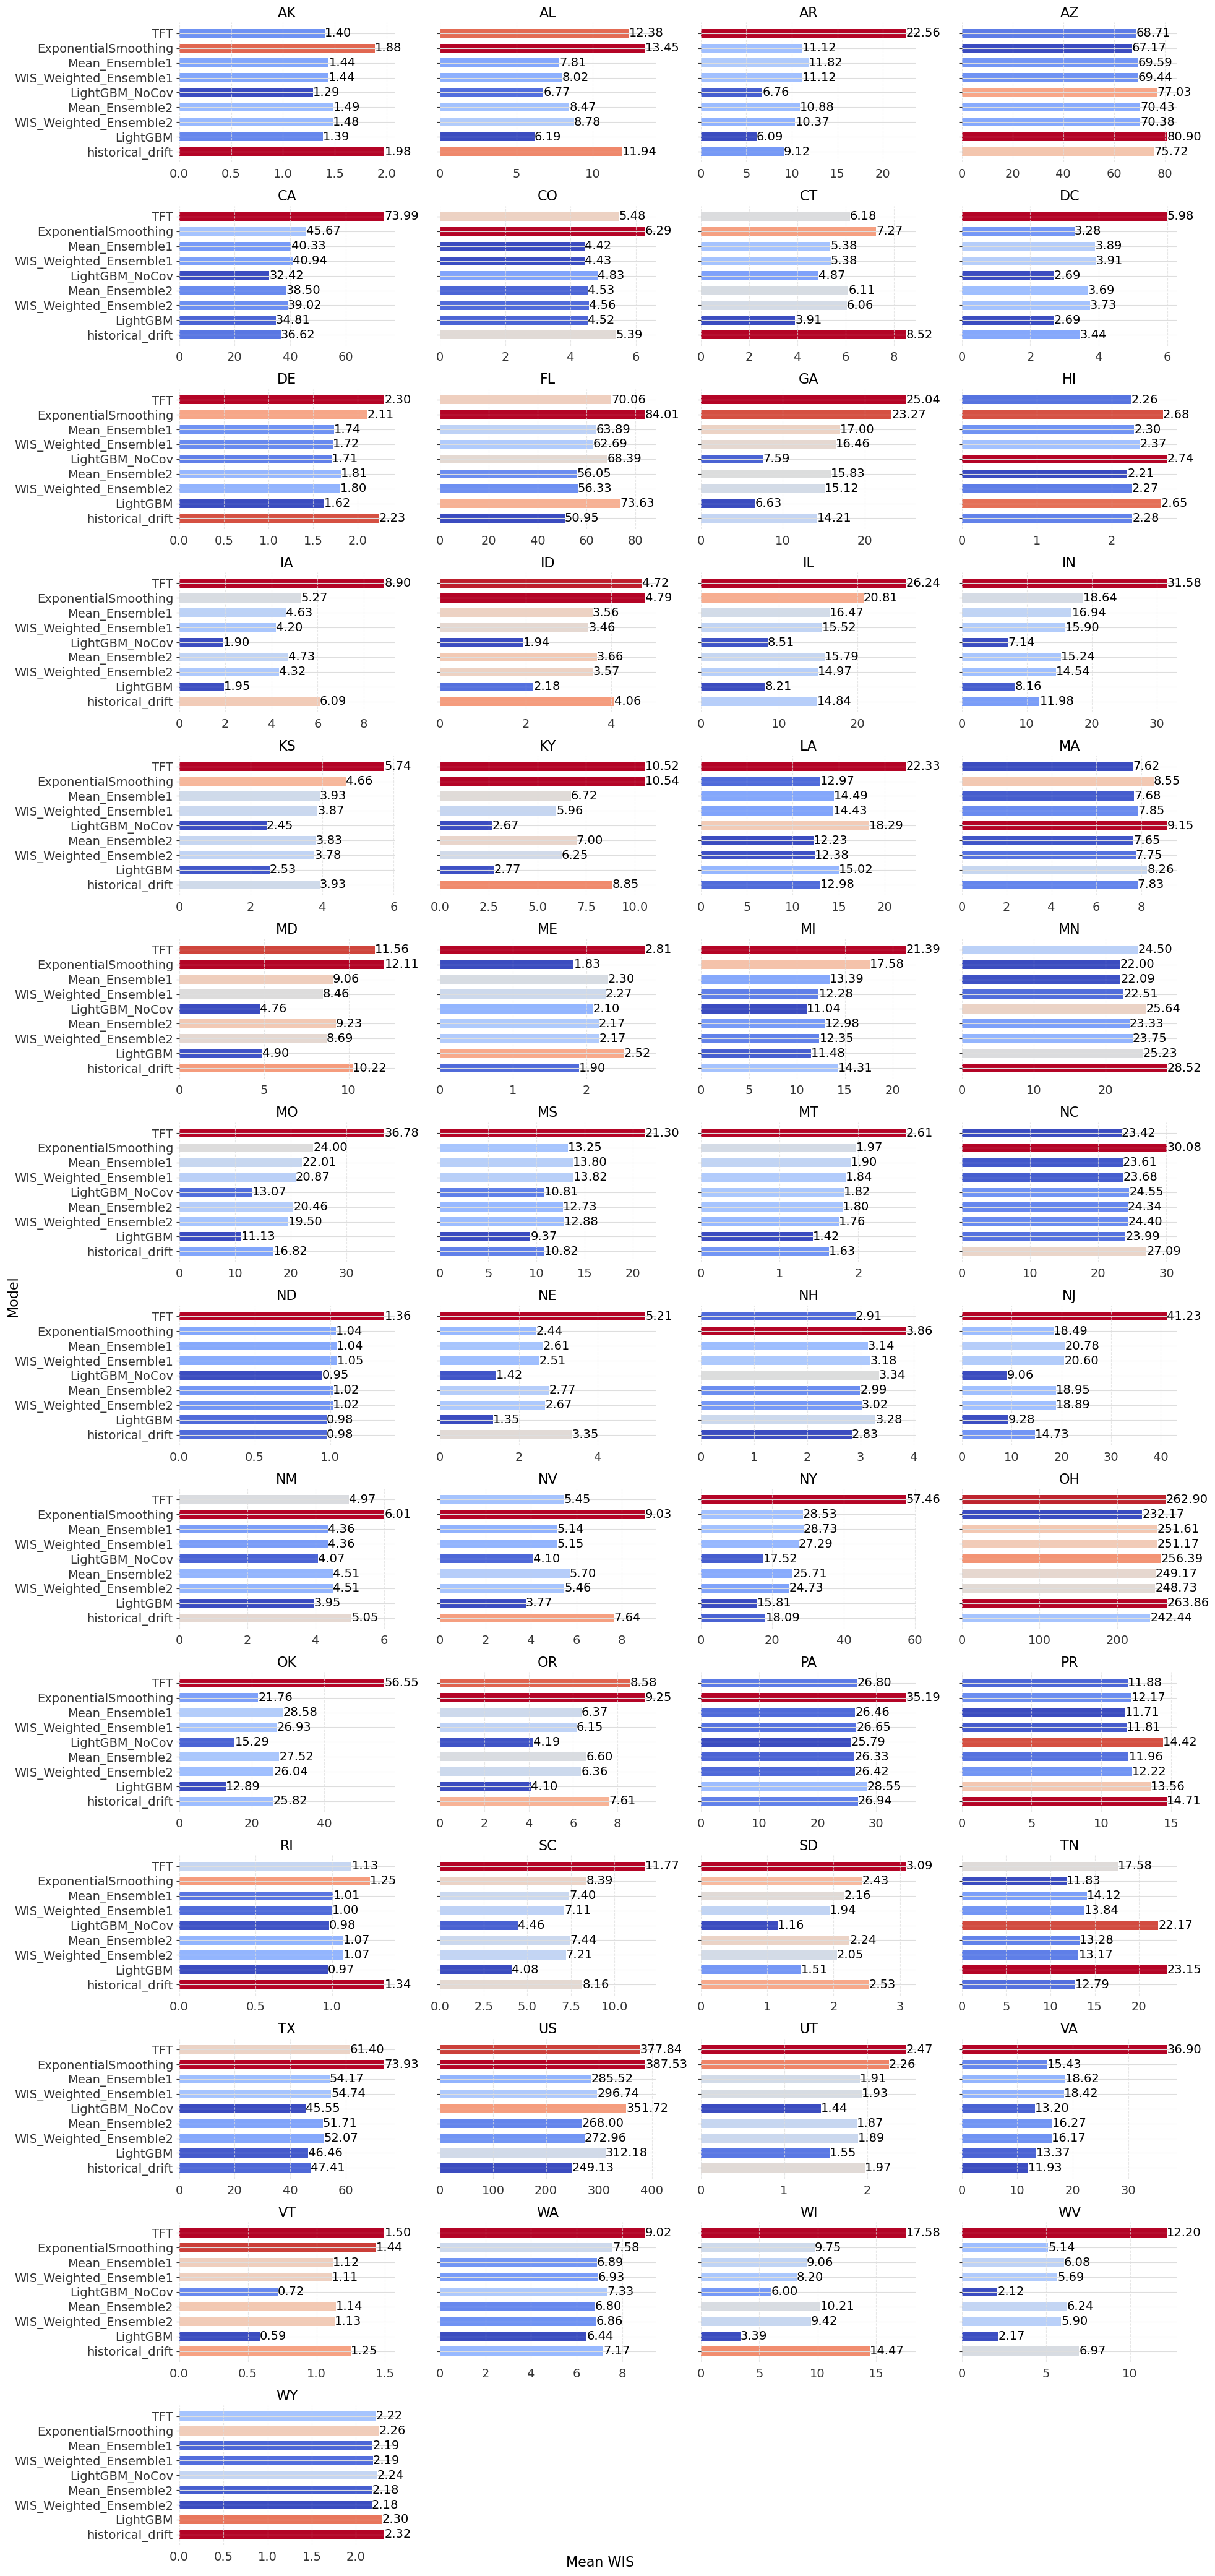

In [63]:
# Group by 'location' and 'model', calculate mean WIS
mean_wis_per_location_model = df_wis.groupby(['location', 'model'])['wis'].mean().unstack()

# Sort models by overall mean WIS for consistent order across locations
overall_mean_wis_model = mean_wis_per_location_model.mean(axis=0).sort_values()
sorted_models = overall_mean_wis_model.index
mean_wis_per_location_model = mean_wis_per_location_model[sorted_models]

# Define number of columns
n_cols = 4
n_locations = len(mean_wis_per_location_model.index)

# Dynamically calculate number of rows
n_rows = (n_locations + n_cols - 1) // n_cols  # Ceiling division to ensure enough rows

# Create the subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3), sharex=False, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, location in enumerate(mean_wis_per_location_model.index):
    ax = axes[i]
    values = mean_wis_per_location_model.loc[location]
    
    # Normalize WIS values for color mapping
    norm = plt.Normalize(values.min(), values.max())
    colors = cm.coolwarm(norm(values))
    
    # Plot horizontal bars
    bars = ax.barh(mean_wis_per_location_model.columns, values, color=colors, height=0.6)
    
    # Add mean WIS values near each bar
    for bar, value in zip(bars, values):
        ax.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', 
                va='center', ha='left', fontsize=14)
    
    ax.set_title(f'{location}', fontsize=16)
    ax.tick_params(axis='x', labelsize=14)
    ax.set_yticks(range(len(mean_wis_per_location_model.columns)))
    ax.set_yticklabels(mean_wis_per_location_model.columns, fontsize=14)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

# Hide unused subplots
for j in range(n_locations, len(axes)):
    fig.delaxes(axes[j])

# Set overarching x-axis and layout
fig.supxlabel('Mean WIS', fontsize=16)
fig.supylabel('Model', fontsize=16)
plt.tight_layout()
plt.show()


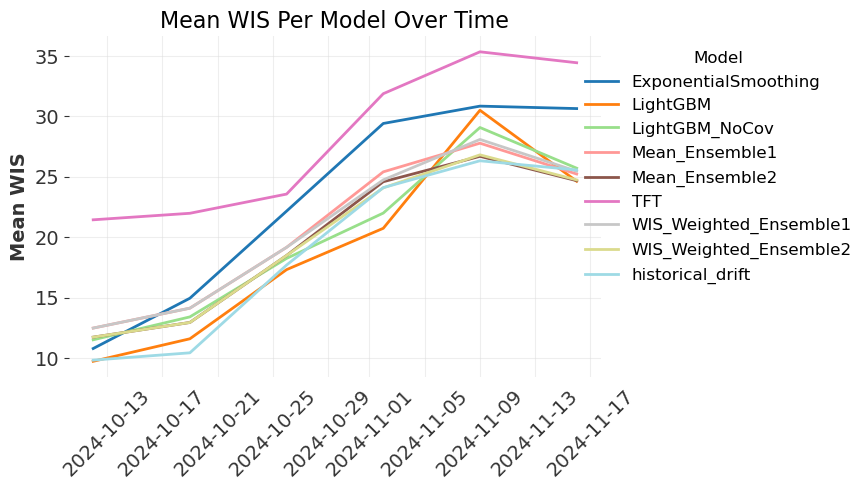

In [64]:
# Group by 'target_date' and 'model', calculate mean WIS
mean_wis_per_date_model = df_wis.groupby(['target_date', 'model'])['wis'].mean().unstack()

colors = plt.cm.tab20(np.linspace(0, 1, len(models)))


plt.figure(figsize=(10, 5))
for i, model in enumerate(mean_wis_per_date_model.columns):
    plt.plot(mean_wis_per_date_model.index, mean_wis_per_date_model[model], label=model, linewidth=2, color=colors[i])

plt.title('Mean WIS Per Model Over Time', fontsize=16)
# plt.xlabel('Target Date', fontsize=14)
plt.ylabel('Mean WIS', fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)  
plt.legend(title='Model', fontsize=12, title_fontsize=12, loc='upper right', bbox_to_anchor=(1.5, 1))
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()